In [1]:
import pandas as pd
import numpy as np

from scipy import stats as sc_stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

2023-04-24 14:17:58.556935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import sys
from os.path import dirname
sys.path.append(dirname("../"))

In [4]:
from src.edl import dense_layers,dense_loss

In [5]:
%load_ext autoreload
%autoreload 2

### Benchmark Model for normal simulated data

In [6]:
def my_data(x_min, x_max, n, train=True):
    x = np.linspace(x_min, x_max, n)
    x = np.expand_dims(x, -1).astype(np.float32)
    sigma = 3 * np.ones_like(x) if train else np.zeros_like(x)
    y = x**3 + np.random.normal(0, sigma).astype(np.float32)
    return x, y

In [7]:
x_train, y_train = my_data(-4, 4, 1000)
x_test, y_test = my_data(-7, 7, 1000, train=False)

Text(0.5, 1.0, 'Distribution of y')

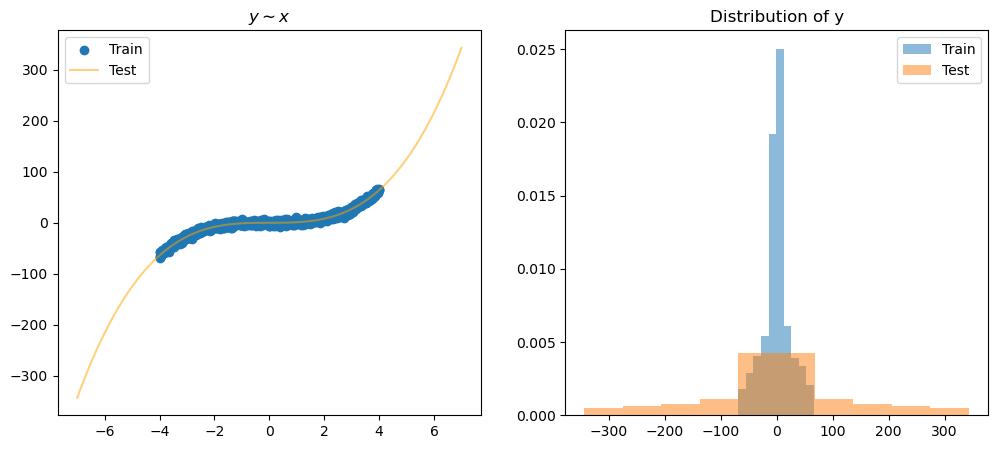

In [8]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(x_train,y_train,label="Train")
ax[0].plot(x_test,y_test,label="Test",alpha = 0.5,color="orange")
ax[0].legend()
ax[0].set_title("$y \sim x$")
ax[1].hist(y_train,density=True,alpha=0.5,label="Train")
ax[1].hist(y_test,density=True,alpha=0.5,label="Test")
ax[1].legend()
ax[1].set_title("Distribution of y")

In [9]:
edl_model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        dense_layers.DenseNormalGamma(1),
    ])

def EvidentialRegressionLoss(true, pred):
        return dense_loss.EvidentialRegression(true, pred, coeff=1e-2)

# Compile and fit the model!
edl_model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-4),
    loss=EvidentialRegressionLoss)

edl_model.fit(x_train, y_train, batch_size=100, epochs=500)

Epoch 1/500


2023-04-24 14:18:16.543058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


10/10 [==============================] - 1s 2ms/step - loss: 8.6200
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 8.4480
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 8.2765
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 8.0861
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 7.8528
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 7.5747
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 7.2548
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 6.8920
Epoch 9/500
10/10 [==============================] - 0s 2ms/step - loss: 6.5103
Epoch 10/500
10/10 [==============================] - 0s 2ms/step - loss: 6.1144
Epoch 11/500
10/10 [==============================] - 0s 3ms/step - loss: 5.7249
Epoch 12/500
10/10 [==============================] - 0s 2ms/step - loss: 5.3590
Epoch 13/500
10/10 [=============================

10/10 [==============================] - 0s 1ms/step - loss: 3.3954
Epoch 103/500
10/10 [==============================] - 0s 1ms/step - loss: 3.3799
Epoch 104/500
10/10 [==============================] - 0s 1ms/step - loss: 3.3640
Epoch 105/500
10/10 [==============================] - 0s 1ms/step - loss: 3.3477
Epoch 106/500
10/10 [==============================] - 0s 1ms/step - loss: 3.3321
Epoch 107/500
10/10 [==============================] - 0s 1ms/step - loss: 3.3155
Epoch 108/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2997
Epoch 109/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2831
Epoch 110/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2674
Epoch 111/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2513
Epoch 112/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2348
Epoch 113/500
10/10 [==============================] - 0s 1ms/step - loss: 3.2198
Epoch 114/500
10/10 [=========

10/10 [==============================] - 0s 1ms/step - loss: 2.6408
Epoch 203/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6396
Epoch 204/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6396
Epoch 205/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6414
Epoch 206/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6368
Epoch 207/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6350
Epoch 208/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6352
Epoch 209/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6347
Epoch 210/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6317
Epoch 211/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6324
Epoch 212/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6340
Epoch 213/500
10/10 [==============================] - 0s 1ms/step - loss: 2.6301
Epoch 214/500
10/10 [=========

10/10 [==============================] - 0s 1ms/step - loss: 2.5938
Epoch 303/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5890
Epoch 304/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5881
Epoch 305/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5880
Epoch 306/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5860
Epoch 307/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5887
Epoch 308/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5873
Epoch 309/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5847
Epoch 310/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5898
Epoch 311/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5867
Epoch 312/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5898
Epoch 313/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5841
Epoch 314/500
10/10 [=========

10/10 [==============================] - 0s 1ms/step - loss: 2.5790
Epoch 403/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5812
Epoch 404/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5787
Epoch 405/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5789
Epoch 406/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5789
Epoch 407/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5793
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5836
Epoch 409/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5812
Epoch 410/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5843
Epoch 411/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5870
Epoch 412/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5801
Epoch 413/500
10/10 [==============================] - 0s 1ms/step - loss: 2.5782
Epoch 414/500
10/10 [=========

Text(0.5, 1.0, '$y \\sim x$')

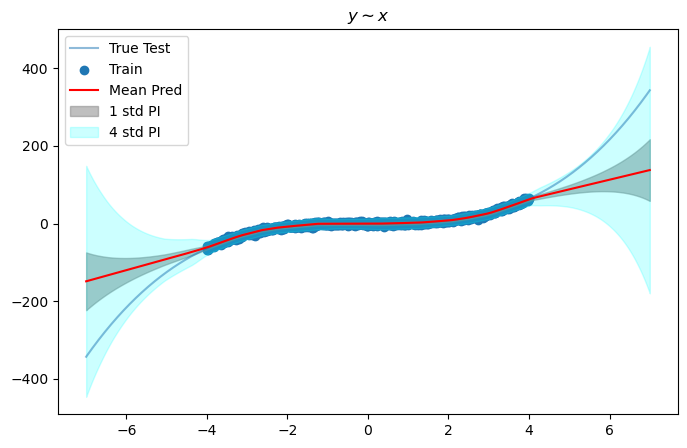

In [10]:
y_pred = edl_model(x_test).numpy()
mu, v, alpha, beta = y_pred[:,0],y_pred[:,1],y_pred[:,2],y_pred[:,3]
var = np.sqrt(beta / (v * (alpha - 1)))
              
#plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x_test,y_test,label="True Test",alpha = 0.5)
ax.scatter(x_train,y_train,label="Train")
ax.plot(x_test.reshape(1000), mu, zorder=3, label="Mean Pred",color="red")
plt.fill_between(x=x_test.reshape(1000),\
                 y1=(mu - 1 * var).reshape(1000), \
                 y2=(mu + 1 * var).reshape(1000),\
                 label="1 std PI",color="grey",alpha=0.5)
plt.fill_between(x=x_test.reshape(1000),\
                 y1=(mu - 4 * var).reshape(1000), \
                 y2=(mu + 4 * var).reshape(1000),\
                 label="4 std PI",color="cyan",alpha=0.2)
ax.legend()
ax.set_title("$y \sim x$")

### Gen synthetic Weibull data

(2000, 1)
(2000, 1)


Text(0.5, 1.0, 'Distribution of y')

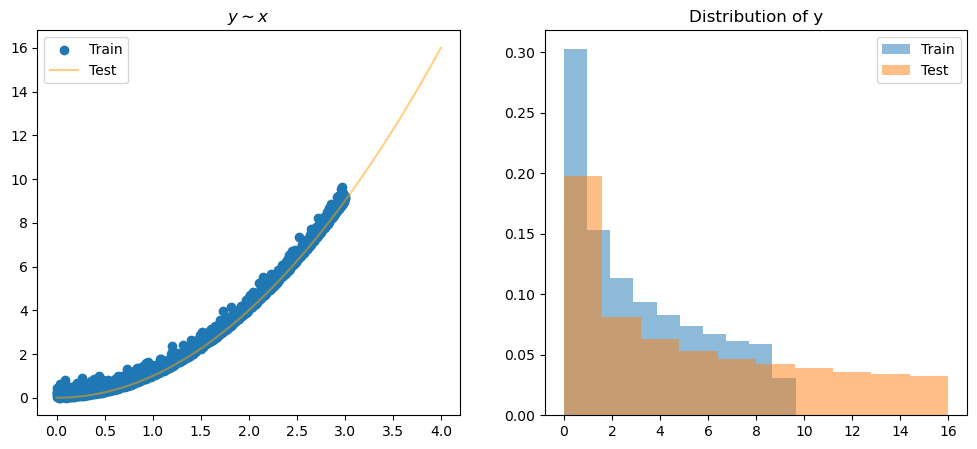

In [153]:
def my_data_weibulll(x_min, x_max, n, train=True):
    x = np.linspace(x_min, x_max, n)
    x = np.expand_dims(x, -1).astype(np.float32)
    print (x.shape)
    if train:
        y = x**2 + 0.2*np.random.weibull(a=1.2,size=x.shape)
    else:
        y = x**2
    return x, y

x_train, y_train = my_data_weibulll(0.0, 3, 2000)
x_test, y_test = my_data_weibulll(0.0,4, 2000, train=False)

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(x_train,y_train,label="Train")
ax[0].plot(x_test,y_test,label="Test",alpha = 0.5, color="orange")
ax[0].legend()
ax[0].set_title("$y \sim x$")
ax[1].hist(y_train,density=True,alpha=0.5,label="Train")
ax[1].hist(y_test,density=True,alpha=0.5,label="Test")
ax[1].legend()
ax[1].set_title("Distribution of y")

In [154]:
edl_model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        dense_layers.DenseNormalGamma(1),
    ])

def EvidentialRegressionLoss(true, pred):
        return dense_loss.EvidentialRegression(true, pred, coeff=1e-2)

# Compile and fit the model!
edl_model2.compile(
    optimizer=tf.keras.optimizers.Adam(5e-4),
    loss=EvidentialRegressionLoss)

edl_model2.fit(x_train, y_train, batch_size=100, epochs=500)

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 3.2977
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 2.7507
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 2.3385
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 2.0273
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 1.7918
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 1.6441
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 1.5424
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 1.4430
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 1.3431
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 1.2247
Epoch 11/500
20/20 [==============================] - 0s 1ms/step - loss: 1.0875
Epoch 12/500
20/20 [==============================] - 0s 1ms/step - loss: 0.9063
Epoch 13/500
20/20 [=================

20/20 [==============================] - 0s 1ms/step - loss: -0.4575
Epoch 102/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4449
Epoch 103/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4405
Epoch 104/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4655
Epoch 105/500
20/20 [==============================] - 0s 2ms/step - loss: -0.4628
Epoch 106/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4311
Epoch 107/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4585
Epoch 108/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4651
Epoch 109/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4571
Epoch 110/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4653
Epoch 111/500
20/20 [==============================] - 0s 2ms/step - loss: -0.4625
Epoch 112/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4651
Epoch 113/500
20/2

20/20 [==============================] - 0s 1ms/step - loss: -0.4633
Epoch 200/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4686
Epoch 201/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4603
Epoch 202/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4616
Epoch 203/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4678
Epoch 204/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4585
Epoch 205/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4726
Epoch 206/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4678
Epoch 207/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4573
Epoch 208/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4697
Epoch 209/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4670
Epoch 210/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4680
Epoch 211/500
20/2

20/20 [==============================] - 0s 1ms/step - loss: -0.4681
Epoch 298/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4735
Epoch 299/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4602
Epoch 300/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4686
Epoch 301/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4735
Epoch 302/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4716
Epoch 303/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4712
Epoch 304/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4701
Epoch 305/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4646
Epoch 306/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4659
Epoch 307/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4735
Epoch 308/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4709
Epoch 309/500
20/2

20/20 [==============================] - 0s 1ms/step - loss: -0.4718
Epoch 396/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4466
Epoch 397/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4514
Epoch 398/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4639
Epoch 399/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4486
Epoch 400/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4574
Epoch 401/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4381
Epoch 402/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4593
Epoch 403/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4713
Epoch 404/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4718
Epoch 405/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4693
Epoch 406/500
20/20 [==============================] - 0s 2ms/step - loss: -0.4534
Epoch 407/500
20/2

20/20 [==============================] - 0s 1ms/step - loss: -0.4740
Epoch 494/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4669
Epoch 495/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4669
Epoch 496/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4683
Epoch 497/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4683
Epoch 498/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4671
Epoch 499/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4590
Epoch 500/500
20/20 [==============================] - 0s 1ms/step - loss: -0.4674


Text(0.5, 1.0, '$y \\sim x$ for Benchmark evidence regression')

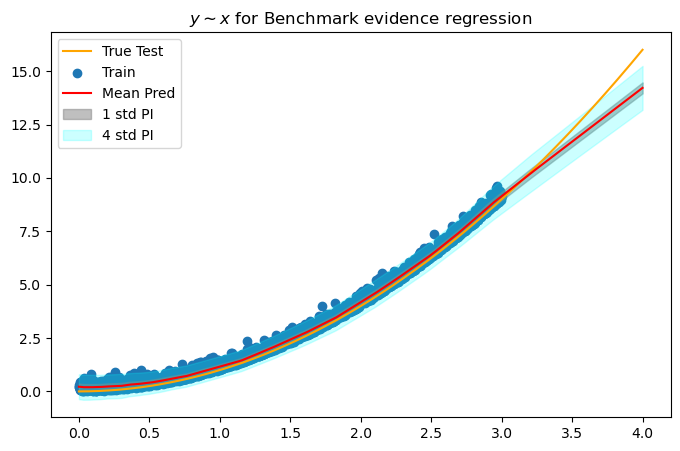

In [205]:
y_pred = edl_model2(x_test).numpy()
mu, v, alpha, beta = y_pred[:,0],y_pred[:,1],y_pred[:,2],y_pred[:,3]
var = np.sqrt(beta / (v * (alpha - 1)))
              
#plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x_test,y_test,label="True Test",alpha = 1, color="orange")
ax.scatter(x_train,y_train,label="Train")
ax.plot(x_test.reshape(2000), mu, zorder=3, label="Mean Pred",color="red")
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(mu - 1 * var).reshape(2000), \
                 y2=(mu + 1 * var).reshape(2000),\
                 label="1 std PI",color="grey",alpha=0.5)
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(mu - 4 * var).reshape(2000), \
                 y2=(mu + 4 * var).reshape(2000),\
                 label="4 std PI",color="cyan",alpha=0.2)
# ax.set_ylim(-10,40)
ax.legend()
ax.set_title("$y \sim x$ for Benchmark evidence regression")

Text(0.5, 1.0, 'Distribnution of y-pred')

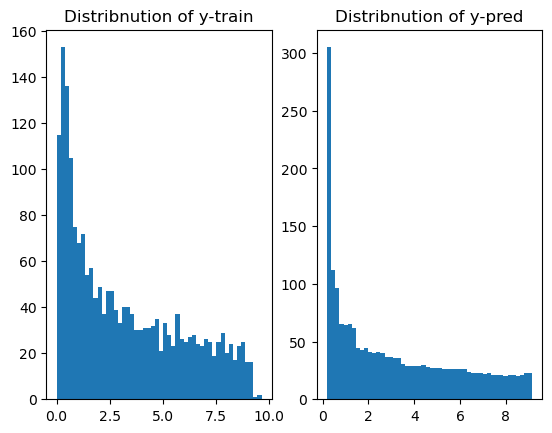

In [157]:
plt.subplot(121)
plt.hist(y_train,bins=50)
plt.title("Distribnution of y-train")
plt.subplot(122)
plt.hist(edl_model2(x_train).numpy()[:,0],bins=50)
plt.title("Distribnution of y-pred")

### same weibull data, weibull evidence

(1.0493193581972582, 0.0, 3.2481558130314108)


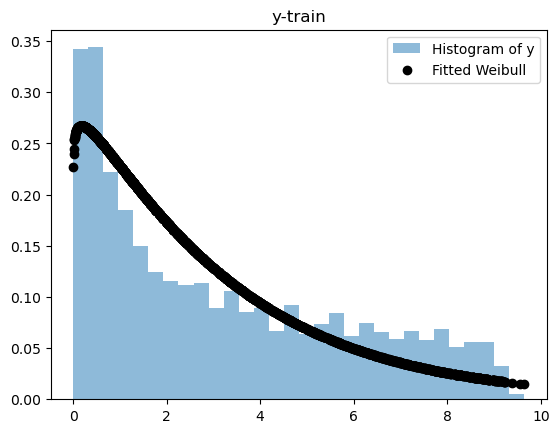

In [206]:
rv = sc_stats.weibull_min.fit(y_train, floc=0.0)
print (rv)
plt.hist(y_train,alpha=0.5,density=True,bins=30,label="Histogram of y")
plt.scatter(y_train, sc_stats.weibull_min.pdf(y_train,*rv),label="Fitted Weibull",color="black")
plt.title("y-train")
plt.legend()

In [207]:
from src.weibull_edl import loss_and_layers

In [208]:
k=1.10493
weibull_model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="softmax"),
        tf.keras.layers.Dense(64, activation="softmax"),
        tf.keras.layers.Dense(32, activation="relu"),
        loss_and_layers.DenseWeibullGamma(1),
    ])

def weibullLoss(true, pred):
        return loss_and_layers.weibull_evidence_Regression(true, pred, k=k, coeff=1e-3)

# Compile and fit the model!
weibull_model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-4),
    loss=weibullLoss)
    

In [209]:
weibull_model.fit(x_train, y_train, batch_size=250, epochs=500)

Epoch 1/500
8/8 [==============================] - 1s 3ms/step - loss: 2.8200
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 2.7949
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 2.7710
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 2.7482
Epoch 5/500
8/8 [==============================] - 0s 5ms/step - loss: 2.7271
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 2.7061
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 2.6850
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 2.6633
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 2.6416
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 2.6200
Epoch 11/500
8/8 [==============================] - 0s 3ms/step - loss: 2.5983
Epoch 12/500
8/8 [==============================] - 0s 3ms/step - loss: 2.5768
Epoch 13/500
8/8 [==============================] - 0s 3ms/st

8/8 [==============================] - 0s 2ms/step - loss: 1.9841
Epoch 105/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9790
Epoch 106/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9737
Epoch 107/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9685
Epoch 108/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9631
Epoch 109/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9578
Epoch 110/500
8/8 [==============================] - 0s 3ms/step - loss: 1.9524
Epoch 111/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9470
Epoch 112/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9417
Epoch 113/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9363
Epoch 114/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9310
Epoch 115/500
8/8 [==============================] - 0s 2ms/step - loss: 1.9258
Epoch 116/500
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 1.6875
Epoch 207/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6858
Epoch 208/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6844
Epoch 209/500
8/8 [==============================] - 0s 3ms/step - loss: 1.6829
Epoch 210/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6816
Epoch 211/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6799
Epoch 212/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6785
Epoch 213/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6771
Epoch 214/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6756
Epoch 215/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6743
Epoch 216/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6730
Epoch 217/500
8/8 [==============================] - 0s 2ms/step - loss: 1.6716
Epoch 218/500
8/8 [==============================] - 0

8/8 [==============================] - 0s 3ms/step - loss: 1.5924
Epoch 309/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5919
Epoch 310/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5914
Epoch 311/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5909
Epoch 312/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5907
Epoch 313/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5899
Epoch 314/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5896
Epoch 315/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5890
Epoch 316/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5886
Epoch 317/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5879
Epoch 318/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5874
Epoch 319/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5870
Epoch 320/500
8/8 [==============================] - 0

8/8 [==============================] - 0s 3ms/step - loss: 1.5572
Epoch 411/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5576
Epoch 412/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5573
Epoch 413/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5565
Epoch 414/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5562
Epoch 415/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5559
Epoch 416/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5558
Epoch 417/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5554
Epoch 418/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5554
Epoch 419/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5558
Epoch 420/500
8/8 [==============================] - 0s 2ms/step - loss: 1.5555
Epoch 421/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5550
Epoch 422/500
8/8 [==============================] - 0

In [210]:
y_pred = weibull_model.predict(x_test)
alpha,beta = y_pred[:,0],y_pred[:,1]

63/63 [==============================] - 0s 1ms/step


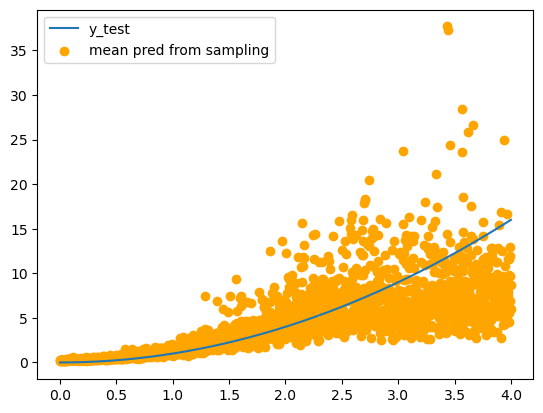

In [211]:
from scipy.stats import invgamma
rv = invgamma(a=alpha,scale=beta*1.0)
theta = rv.rvs(2000)
lambda_weibull = theta**(1/k)
y_pred_check = np.array([lambda_weibull*np.random.weibull(a=k) for i in range(100)]).mean(axis=0)

plt.plot(x_test,y_test,label="y_test")
plt.scatter(x_test,y_pred_check,color="orange",label="mean pred from sampling")
plt.legend()

Text(0.5, 1.0, '$y \\sim x$, Prediction using sampling')

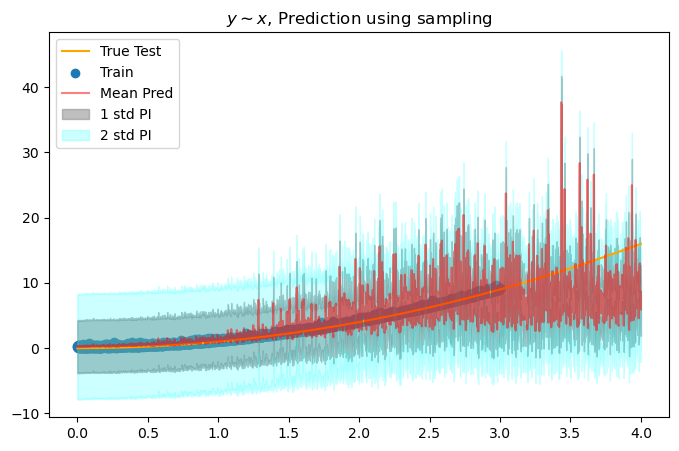

In [212]:
#plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x_test,y_test,label="True Test",alpha = 1.0,color="orange")
ax.scatter(x_train,y_train,label="Train")
ax.plot(x_test.reshape(2000), y_pred_check, zorder=3, label="Mean Pred",color="red", alpha = 0.5)
var = np.std(y_pred_check)
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(y_pred_check - 1 * var).reshape(2000), \
                 y2=(y_pred_check + 1 * var).reshape(2000),\
                 label="1 std PI",color="grey",alpha=0.5)
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(y_pred_check - 2 * var).reshape(2000), \
                 y2=(y_pred_check + 2 * var).reshape(2000),\
                 label="2 std PI",color="cyan",alpha=0.2)
# ax.set_ylim(-100,400)
# ax.set_xlim(0,5)
ax.legend()
ax.set_title("$y \sim x$, Prediction using sampling")

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_5062/3188357920.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Distribnution of y-pred (Weibull)')

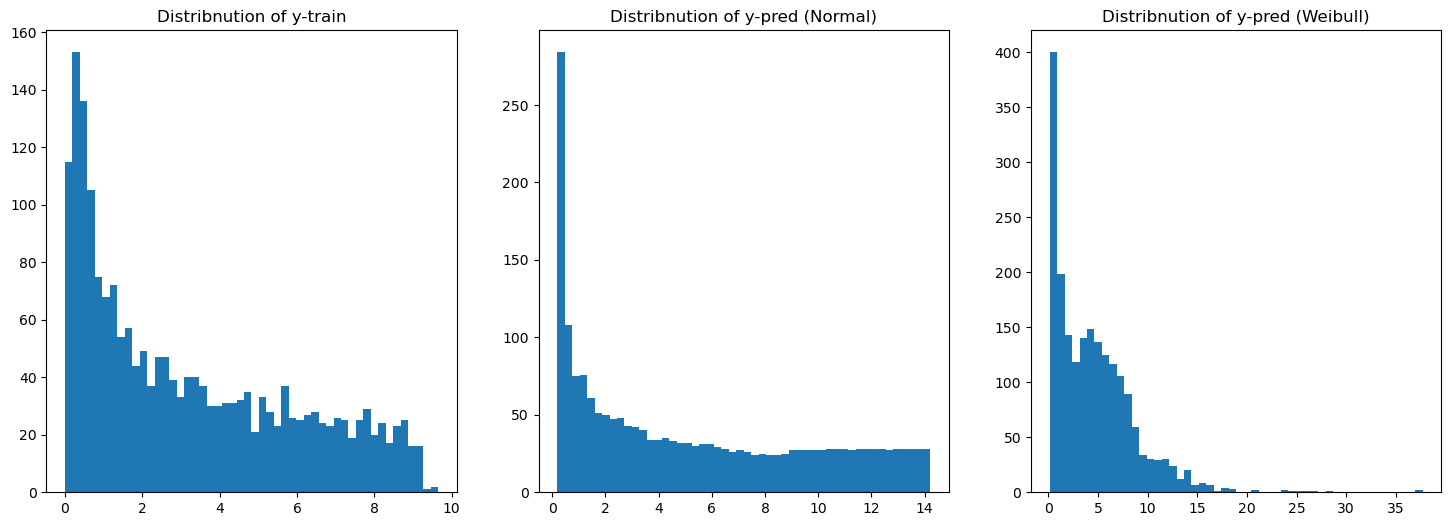

In [213]:
fig,ax=plt.subplots(figsize=(18,6))
plt.subplot(131)
plt.hist(y_train,bins=50)
plt.title("Distribnution of y-train")
plt.subplot(132)
plt.hist(edl_model2(x_test).numpy()[:,0],bins=50)
plt.title("Distribnution of y-pred (Normal)")
plt.subplot(133)
plt.hist(y_pred_check,bins=50)
plt.title("Distribnution of y-pred (Weibull)")

In [214]:
from scipy.special import loggamma

In [215]:
mean_pred_log = (loggamma(1+ (1/k)) - loggamma(alpha) + loggamma(alpha-(1/k))\
                + (1/k)*np.log(beta))
mu = np.exp(mean_pred_log)

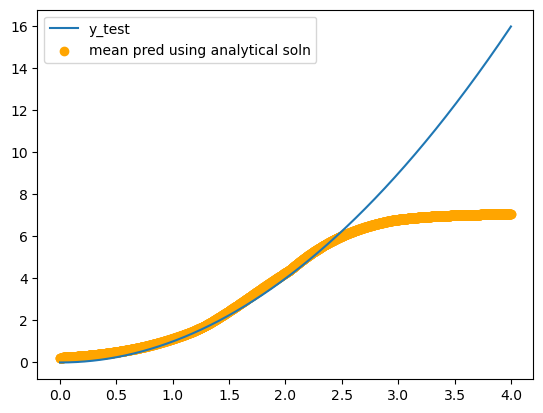

In [216]:
plt.plot(x_test,y_test,label="y_test")
plt.scatter(x_test,mu,color="orange",label="mean pred using analytical soln")
plt.legend()

Text(0.5, 1.0, '$y \\sim x$, Prediction using analytical soln')

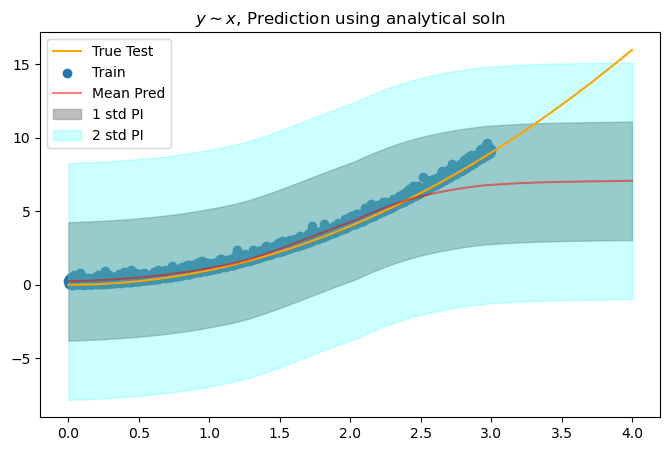

In [217]:
#plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x_test,y_test,label="True Test",alpha = 1.0,color="orange")
ax.scatter(x_train,y_train,label="Train")
ax.plot(x_test.reshape(2000), mu, zorder=3, label="Mean Pred",color="red", alpha = 0.5)
var = np.std(y_pred_check)
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(mu - 1 * var).reshape(2000), \
                 y2=(mu + 1 * var).reshape(2000),\
                 label="1 std PI",color="grey",alpha=0.5)
plt.fill_between(x=x_test.reshape(2000),\
                 y1=(mu - 2 * var).reshape(2000), \
                 y2=(mu + 2 * var).reshape(2000),\
                 label="2 std PI",color="cyan",alpha=0.2)
# ax.set_ylim(-100,400)
# ax.set_xlim(0,5)
ax.legend()
ax.set_title("$y \sim x$, Prediction using analytical soln")

from scipy.special import loggamma

mean_pred_log = loggamma(1+(1/k)) + loggamma((k*alpha-1)/k) - np.log(k) - ((alpha-1)/k)*np.log(beta)
mu = np.exp(mean_pred_log)

plt.plot(x_test,mu)

plt.plot(mu,y_pred_check)

plt.plot(mu)

#plot
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x_test,y_test,label="True Test",alpha = 0.5)
ax.scatter(x_train,y_train,label="Train")
ax.plot(x_test.reshape(1000), mu, zorder=3, label="Mean Pred",color="red")
# plt.fill_between(x=x_test.reshape(1000),\
#                  y1=(mu - 1 * var).reshape(1000), \
#                  y2=(mu + 1 * var).reshape(1000),\
#                  label="1 std PI",color="grey",alpha=0.5)
# plt.fill_between(x=x_test.reshape(1000),\
#                  y1=(mu - 4 * var).reshape(1000), \
#                  y2=(mu + 4 * var).reshape(1000),\
#                  label="4 std PI",color="cyan",alpha=0.2)
ax.set_ylim(-100,400)
ax.set_xlim(0,5)
ax.legend()
ax.set_title("$y \sim x$")

def check(alpha,beta,y):
    nll = -(np.log(alpha) + np.log(k) + (k-1)* np.log(y)\
            + (alpha * np.log(beta)) - (alpha+1)*np.log(y + beta))
    return nll

check(y_train[0],4,0.2)